# K-Fold Cross Validation


In [38]:
from sklearn.model_selection import KFold # import KFold
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[5,6],[7,8]]) # create an array
y = np.array([1, 2, 3, 4,5,6]) # Create another array

kf = KFold(n_splits=3, random_state=None, shuffle=False)


In [39]:
X

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [40]:
y

array([1, 2, 3, 4, 5, 6])

In [41]:
fold =0
for train_index, test_index in kf.split(X):
    fold=fold+1
    print("Fold",fold,"TRAIN index:", train_index, "TEST index:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
   

Fold 1 TRAIN index: [2 3 4 5] TEST index: [0 1]
Fold 2 TRAIN index: [0 1 4 5] TEST index: [2 3]
Fold 3 TRAIN index: [0 1 2 3] TEST index: [4 5]


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold # import KFold

url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)
df =df.sample(frac=1).reset_index(drop=True)
df = df[df['grade'] > 4]

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3125079013,20150430T000000,1065000.0,3,2.50,3970,263538,1.5,0,0,...,9,3970,0,1991,0,98024,47.6067,-121.952,3970,194676
1,3342700405,20140522T000000,585000.0,4,1.75,3000,42200,1.0,0,3,...,7,1500,1500,1950,0,98056,47.5265,-122.202,2500,9821
2,7626200235,20140523T000000,464600.0,3,1.75,1120,5500,1.5,0,0,...,7,1120,0,1925,0,98136,47.5445,-122.391,1490,5500
3,8122600165,20141015T000000,273000.0,3,1.00,1500,6250,1.0,0,0,...,6,890,610,1945,0,98126,47.5365,-122.368,1210,6250
4,1656600310,20140714T000000,629000.0,4,2.50,2660,22050,2.0,0,0,...,9,2660,0,1996,0,98059,47.4911,-122.125,3060,21111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,126049100,20141104T000000,398000.0,3,1.75,1830,27468,1.0,0,0,...,7,1830,0,1954,0,98028,47.7754,-122.233,1860,10180
21609,868000530,20140702T000000,645000.0,3,1.75,2270,11472,1.0,0,0,...,7,1370,900,1956,0,98177,47.7057,-122.374,2270,8340
21610,5347200162,20140528T000000,210000.0,2,1.50,880,1157,2.0,0,0,...,7,880,0,2007,0,98126,47.5188,-122.376,1070,1203
21611,9273200140,20150121T000000,1310000.0,2,2.25,3950,3938,2.0,0,4,...,10,2910,1040,1991,0,98116,47.5912,-122.384,3220,4500


In [43]:

# Selecting columns I am interested in
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price','condition','grade','yr_built','zipcode']

df = df.loc[:, columns]
df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price,condition,grade,yr_built,zipcode
0,3,2.50,3970,263538,1.5,1065000.0,3,9,1991,98024
1,4,1.75,3000,42200,1.0,585000.0,3,7,1950,98056
2,3,1.75,1120,5500,1.5,464600.0,4,7,1925,98136
3,3,1.00,1500,6250,1.0,273000.0,3,6,1945,98126
4,4,2.50,2660,22050,2.0,629000.0,3,9,1996,98059
5,4,2.50,3280,27441,2.0,699000.0,3,9,1996,98053
6,4,1.00,1980,10350,1.0,395000.0,4,7,1968,98027
7,3,1.75,1510,11120,1.0,490000.0,4,8,1984,98005
8,4,2.00,2060,5000,1.0,612500.0,3,7,1949,98117
9,4,3.00,3570,10273,1.5,895000.0,3,9,1935,98074


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21580 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21580 non-null  int64  
 1   bathrooms    21580 non-null  float64
 2   sqft_living  21580 non-null  int64  
 3   sqft_lot     21580 non-null  int64  
 4   floors       21580 non-null  float64
 5   price        21580 non-null  float64
 6   condition    21580 non-null  int64  
 7   grade        21580 non-null  int64  
 8   yr_built     21580 non-null  int64  
 9   zipcode      21580 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.8 MB


<Axes: >

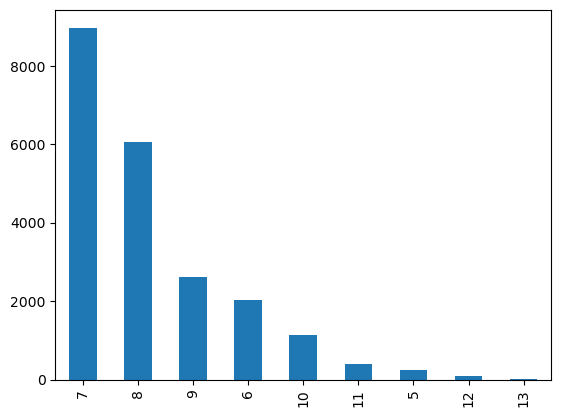

In [45]:
df['grade'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [46]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price','condition','yr_built','zipcode']
X = df.loc[:, features]
y = df.loc[:, ['grade']]

In [47]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price,condition,yr_built,zipcode
0,3,2.50,3970,263538,1.5,1065000.0,3,1991,98024
1,4,1.75,3000,42200,1.0,585000.0,3,1950,98056
2,3,1.75,1120,5500,1.5,464600.0,4,1925,98136
3,3,1.00,1500,6250,1.0,273000.0,3,1945,98126
4,4,2.50,2660,22050,2.0,629000.0,3,1996,98059
...,...,...,...,...,...,...,...,...,...
21608,3,1.75,1830,27468,1.0,398000.0,3,1954,98028
21609,3,1.75,2270,11472,1.0,645000.0,4,1956,98177
21610,2,1.50,880,1157,2.0,210000.0,3,2007,98126
21611,2,2.25,3950,3938,2.0,1310000.0,3,1991,98116


In [48]:
y

,grade
0,9
1,7
2,7
3,6
4,9
...,...
21608,7
21609,7
21610,7
21611,10


In [49]:
y.value_counts().sort_index()

grade
5         242
6        2038
7        8981
8        6068
9        2615
10       1134
11        399
12         90
13         13
dtype: int64

In [50]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [52]:
fold = 0
for train_index, test_index in kfold.split(X):
    fold += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    print("Fold :",fold, "X_train:", X_train.shape, "y_train:", y_train.shape)

    

Fold : 1 X_train: (17264, 9) y_train: (17264, 1)
Fold : 2 X_train: (17264, 9) y_train: (17264, 1)
Fold : 3 X_train: (17264, 9) y_train: (17264, 1)
Fold : 4 X_train: (17264, 9) y_train: (17264, 1)
Fold : 5 X_train: (17264, 9) y_train: (17264, 1)


# Stratified K-Fold Cross Validation


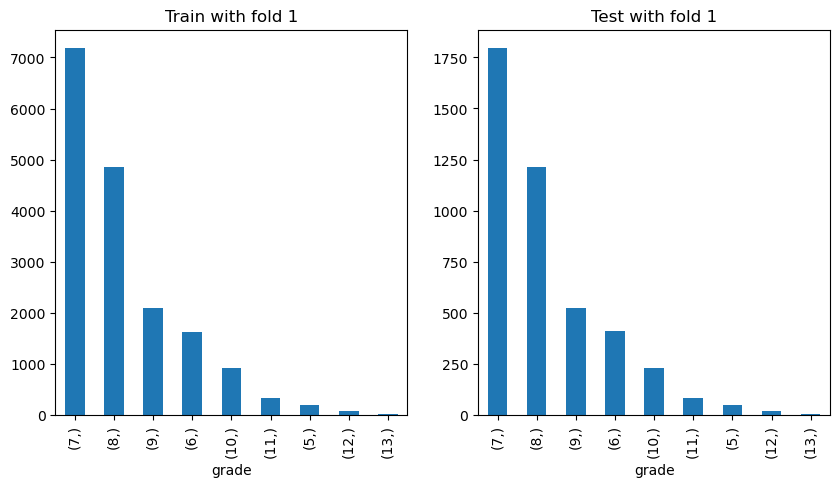

X_train: (17264, 9) y_train: (17264, 1)


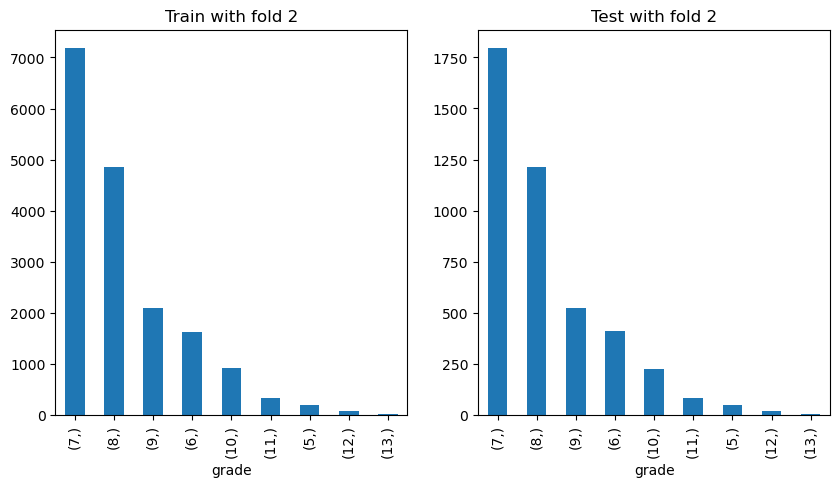

X_train: (17264, 9) y_train: (17264, 1)


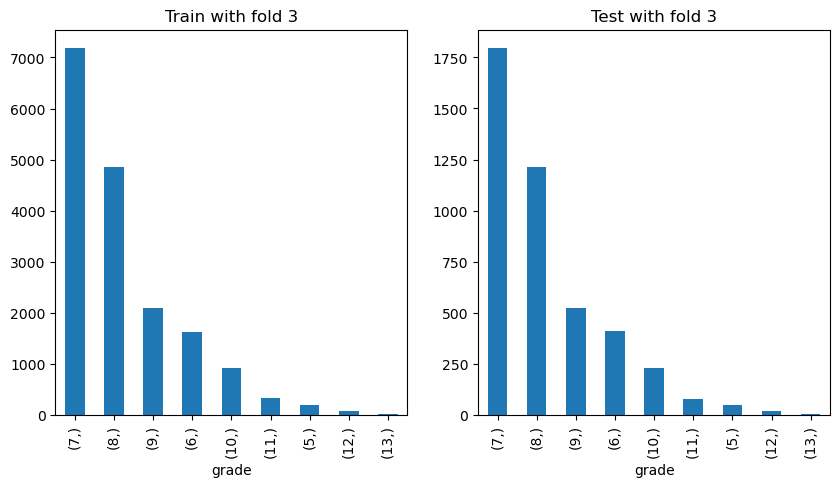

X_train: (17264, 9) y_train: (17264, 1)


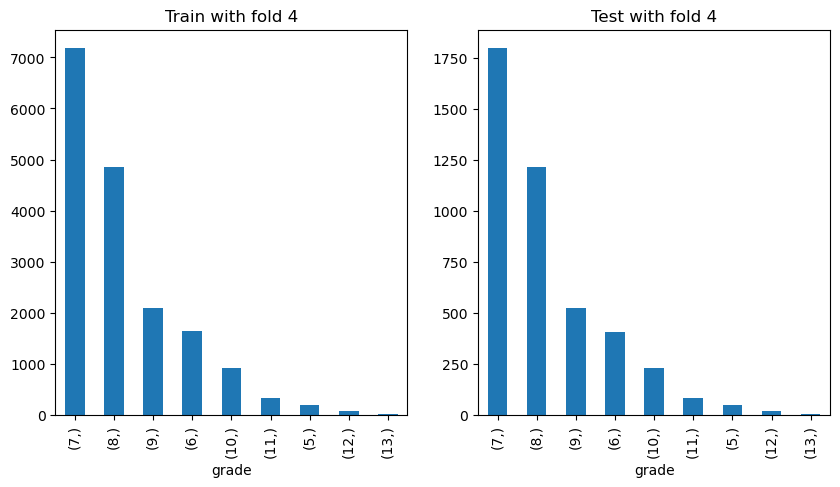

X_train: (17264, 9) y_train: (17264, 1)


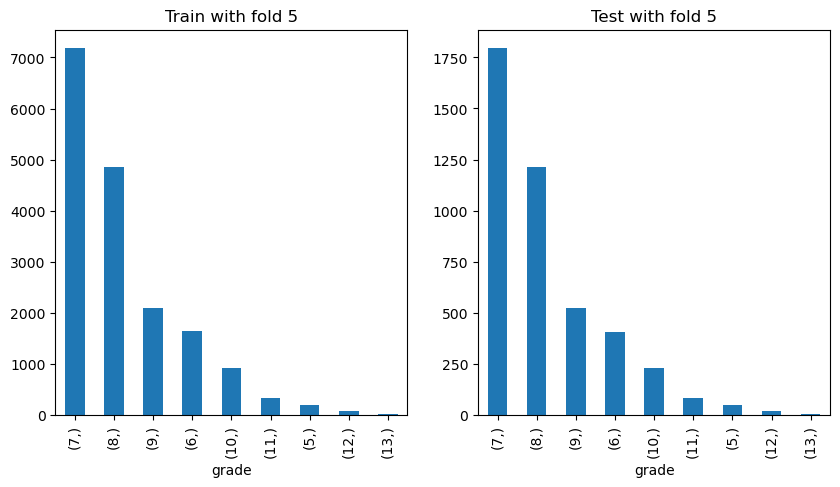

X_train: (17264, 9) y_train: (17264, 1)


In [34]:

from sklearn.model_selection import StratifiedKFold


strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


fold = 0
for train_index, test_index in strat_kfold.split(X, y.astype('int')):
    fold += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

 
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    (y_train.value_counts().sort_values(ascending=False)).plot(kind='bar', ax=axs[0], title='Train with fold '+str(fold))
    (y_test.value_counts().sort_values(ascending=False)).plot(kind='bar', ax=axs[1], title='Test with fold '+str(fold))
    plt.show()

    print("X_train:", X_train.shape, "y_train:", y_train.shape)